In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    # Our activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

In [ ]:
# Weights and biases generated randomly
weights = np.array([0.187123, -0.1918723, 0.012653, -1.12263, 1.17236, 0.22234])
bias = np.array([1.71326, 0.7128397, -0.327839])


In [ ]:
class OurNeuralNetwork:
    def __init__(self):
        # Weights
        self.weights = weights
        self.w1 = self.weights[0]
        self.w2 = self.weights[1]
        self.w3 = self.weights[2]
        self.w4 = self.weights[3]
        self.w5 = self.weights[4]
        self.w6 = self.weights[5]

        # Biases
        self.bias = bias
        self.b1 = self.bias[0]
        self.b2 = self.bias[1]
        self.b3 = self.bias[2]

    def feedforward(self, x):

        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1

    def train(self, data, all_y_trues):
        learn_rate = 0.1
        epochs = 5000 # number of times to loop through the entire dataset

        mse = []

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Do a feedforward (we'll need these values later)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)

                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)

                # --- Update weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- Calculate total loss at the end of each epoch
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                mse.append(loss)
                print("Epoch %d loss: %.3f" % (epoch, loss))

        plt.plot(mse, label='Loss', color='blue')




In [ ]:
# Load the large dataset
dataset = pd.read_csv('trainingdataset.csv')

# Convert 'Classification' column to numerical values (Good=1, Bad=0)
dataset['Classification'] = dataset['Classification'].map({'Good': 1, 'Bad': 0})

data = dataset[['Area', 'Bathrooms']].to_numpy()
all_y_trues = dataset['Classification'].to_numpy()

scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(data)


Epoch 0 loss: 0.211
Epoch 10 loss: 0.211
Epoch 20 loss: 0.211
Epoch 30 loss: 0.211
Epoch 40 loss: 0.211
Epoch 50 loss: 0.211
Epoch 60 loss: 0.211
Epoch 70 loss: 0.210
Epoch 80 loss: 0.210
Epoch 90 loss: 0.210
Epoch 100 loss: 0.210
Epoch 110 loss: 0.210
Epoch 120 loss: 0.210
Epoch 130 loss: 0.210
Epoch 140 loss: 0.210
Epoch 150 loss: 0.210
Epoch 160 loss: 0.210
Epoch 170 loss: 0.210
Epoch 180 loss: 0.210
Epoch 190 loss: 0.210
Epoch 200 loss: 0.210
Epoch 210 loss: 0.209
Epoch 220 loss: 0.209
Epoch 230 loss: 0.209
Epoch 240 loss: 0.209
Epoch 250 loss: 0.209
Epoch 260 loss: 0.209
Epoch 270 loss: 0.209
Epoch 280 loss: 0.209
Epoch 290 loss: 0.209
Epoch 300 loss: 0.208
Epoch 310 loss: 0.208
Epoch 320 loss: 0.208
Epoch 330 loss: 0.208
Epoch 340 loss: 0.208
Epoch 350 loss: 0.207
Epoch 360 loss: 0.207
Epoch 370 loss: 0.207
Epoch 380 loss: 0.207
Epoch 390 loss: 0.206
Epoch 400 loss: 0.206
Epoch 410 loss: 0.206
Epoch 420 loss: 0.205
Epoch 430 loss: 0.205
Epoch 440 loss: 0.204
Epoch 450 loss: 0.204

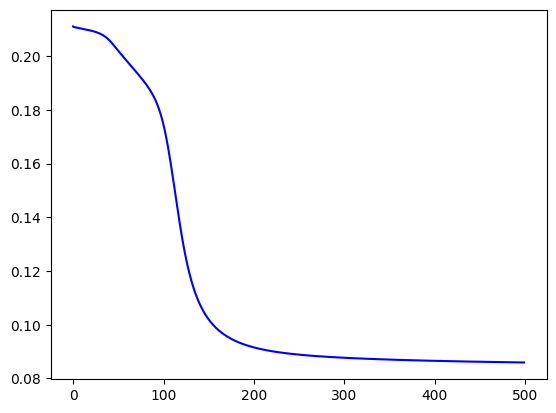

In [ ]:
# Step 2: Initialize and train the neural network
network = OurNeuralNetwork()
network.train(dataset_scaled, all_y_trues)

In [ ]:
# Step 3: Scale and make predictions on new data (for example, [4000, 4])
new_house = np.array([[2200, 3]])
new_house_scaled = scaler.transform(new_house)
print("New house prediction: %.3f" % network.feedforward(new_house_scaled[0]))

New house prediction: 0.911


In [ ]:
# Get the final weights and biases
final_weights = network.weights
final_bias = network.bias
print("Final Weights:", final_weights)
print("Final Biases:", final_bias)


Final Weights: [ 0.187123  -0.1918723  0.012653  -1.12263    1.17236    0.22234  ]
Final Biases: [ 1.71326    0.7128397 -0.327839 ]


In [ ]:
# Example Property dataset not found in the training dataset
houses = np.array([
    [2200, 3],
    [4000, 4],
    [3000, 2],
    [1500, 1],
    [5000, 5],
    [2500, 3],
    [3500, 4],
    [1234, 3],
    [2345, 2],
    [3456, 4]
])
houses_scaled = scaler.transform(houses)
threshold = 0.5  # Define the threshold

print("Predictions for new houses:")
print("---------------------------")
for house, original_house in zip(houses_scaled, houses):
    prediction = network.feedforward(house)
    result = "Good" if prediction > threshold else "Bad"
    print(f"House with {original_house[0]} area and {original_house[1]} bathrooms:")
    print(f"  Prediction: {prediction:.3f} - {result} \n")

Predictions for new houses:
---------------------------
House with 2200 area and 3 bathrooms:
  Prediction: 0.911 - Good 

House with 4000 area and 4 bathrooms:
  Prediction: 0.017 - Bad 

House with 3000 area and 2 bathrooms:
  Prediction: 0.130 - Bad 

House with 1500 area and 1 bathrooms:
  Prediction: 0.018 - Bad 

House with 5000 area and 5 bathrooms:
  Prediction: 0.016 - Bad 

House with 2500 area and 3 bathrooms:
  Prediction: 0.877 - Good 

House with 3500 area and 4 bathrooms:
  Prediction: 0.021 - Bad 

House with 1234 area and 3 bathrooms:
  Prediction: 0.777 - Good 

House with 2345 area and 2 bathrooms:
  Prediction: 0.116 - Bad 

House with 3456 area and 4 bathrooms:
  Prediction: 0.022 - Bad 

